In [10]:
from functions import *
from tqdm.notebook import tqdm

noise = [i / 100 for i in range(0, 50, 10)]
correlations, predictivities = [], []

for trial in tqdm(range(200)):
    data = generate_hidden_factors(samples=200, seed=trial)
    train, test = generate_observations(data)
    results = run_experiment(train, test, noise, verbose=False)
    correlations.append(get_correlations(results)[0])
    predictivities.append(get_correlations(results)[1])

  0%|          | 0/200 [00:00<?, ?it/s]

/Users/fernandoassad/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/fernandoassad/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/fernandoassad/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/fernandoassad/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider inc

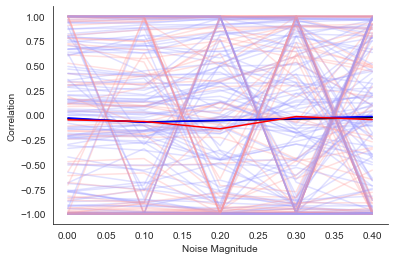

In [11]:
sns.set_style('white')

high, low = [], []

for correlation, predictivity in zip(correlations, predictivities):
    if predictivity > 0.7:
        sns.lineplot(x=noise, y=correlation, alpha=0.3, color=(0.6, 0.6, 1))
        high.append(correlation)
    else:
        sns.lineplot(x=noise, y=correlation, alpha=0.3, color=(1, 0.6, 0.6))
        low.append(correlation)

mean_path = np.average(np.array(correlations), axis=0)
sns.lineplot(x=noise, y=mean_path, color='k')

mean_path = np.average(np.array(high), axis=0)
sns.lineplot(x=noise, y=mean_path, color='blue')

mean_path = np.average(np.array(low), axis=0)
sns.lineplot(x=noise, y=mean_path, color='red')

sns.despine()
plt.xlabel('Noise Magnitude'); plt.ylabel('Correlation')
plt.savefig('results/multiple_trials_2.png', dpi=200)
plt.show()